In [2]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle # For rectangles
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
from scipy import stats # For linregress (trends)
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
sys.path.insert(1, '/home/mlalande/notebooks') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
u.check_virtual_memory()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
3.8.2 | packaged by conda-forge | (default, Feb 28 2020, 17:15:22) 
[GCC 7.3.0]
Virtual memory usage - total: 252 GB / available: 221 GB / percent used: 12.3 %


# Check model data

In [9]:
var = 't2m'
folder = 'ATM'

# Define zone
latlim=(10,50)
lonlim=(60,110)

label = 'Near-Surface Air Temperature'
units = '°C'
cmap='CoolWarm'
levels=plot.arange(-30,30,5)

root = '/data/mlalande/gpfsstore/rech/goe/ufz23bm/IGCM_OUT/LMDZOR/PROD/clim'

## Define period

In [20]:
path_1 = root+'/clim-relief-def-NMC/'+folder+'/Analyse/TS_MO'
xr.open_mfdataset(path_1+'/*'+var+'.nc', combine='by_coords').time_counter.coords

Coordinates:
  * time_counter   (time_counter) object 1980-01-16 00:00:00 ... 1989-12-16 00:00:00
    time_centered  (time_counter) object dask.array<chunksize=(120,), meta=np.ndarray>

In [12]:
# Here the time doesn't make so much sense because the simulation are clim
period = slice('1980','1989')

## Load climatologies

In [29]:
title_1 = 'Default'
path_1 = root+'/clim-relief-def-NMC/'+folder+'/Analyse/TS_MO'
model_1_clim = xr.open_mfdataset(path_1+'/*'+var+'.nc', combine='by_coords')[var].mean('time_counter') - 273.15
model_1_clim.load()

<xarray.DataArray 't2m' (lat: 143, lon: 144)>
array([[-18.114182, -18.114182, -18.114182, ..., -18.114182, -18.114182,
        -18.114182],
       [-17.24353 , -17.26361 , -17.276596, ..., -17.198395, -17.201462,
        -17.227234],
       [-17.255142, -17.293243, -17.308533, ..., -17.187073, -17.194397,
        -17.225449],
       ...,
       [-46.210754, -45.98842 , -45.89975 , ..., -45.300613, -45.07788 ,
        -45.32646 ],
       [-51.03302 , -50.251633, -50.132767, ..., -52.67964 , -52.30861 ,
        -51.432358],
       [-51.607513, -51.607513, -51.607513, ..., -51.607513, -51.607513,
        -51.607513]], dtype=float32)
Coordinates:
  * lat      (lat) float32 90.0 88.73239 87.46479 ... -87.46479 -88.73239 -90.0
  * lon      (lon) float32 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5

In [30]:
title_2 = 'GMTED2010-00625deg'
path_2 = root+'/clim-relief-GMTED2010-00625deg-NMC/'+folder+'/Analyse/TS_MO'
model_2_clim = xr.open_mfdataset(path_2+'/*'+var+'.nc', combine='by_coords')[var].mean('time_counter') - 273.15
model_2_clim.load()

<xarray.DataArray 't2m' (lat: 143, lon: 144)>
array([[-18.00238 , -18.00238 , -18.00238 , ..., -18.00238 , -18.00238 ,
        -18.00238 ],
       [-17.060059, -17.100464, -17.09143 , ..., -17.032532, -17.024872,
        -17.055695],
       [-17.005554, -17.0177  , -17.049866, ..., -16.93811 , -16.947998,
        -16.972778],
       ...,
       [-46.111282, -45.93849 , -45.869568, ..., -45.31392 , -45.765182,
        -46.122025],
       [-51.47676 , -49.69893 , -50.082703, ..., -51.03917 , -51.835403,
        -50.916443],
       [-51.629257, -51.629257, -51.629257, ..., -51.629257, -51.629257,
        -51.629257]], dtype=float32)
Coordinates:
  * lat      (lat) float32 90.0 88.73239 87.46479 ... -87.46479 -88.73239 -90.0
  * lon      (lon) float32 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5

# Load obs
## cru_ts4.00
More recent version available: https://crudata.uea.ac.uk/cru/data/hrg/  
-> pas évident à télécharger encore... les netCDF ne sont pas reconnus directement, je vais rester du coup sur la version 4.00 sur CICLAD

See: http://localhost:7227/notebooks/notebooks/CICLAD/Himalaya/CMIP6_IPSL_bias/Temperature.ipynb

In [27]:
obs_longname = 'CRU TS v. 4.00'
obs_name = 'CRU'

obs = xr.open_dataset('/bdd/cru/cru_ts_4.00/data/tmp/cru_ts4.00.1901.2015.tmp.dat.nc').sel(time=period).tmp
obs_clim = u.clim(obs, calendar=obs.time.encoding['calendar'])
obs_clim.load()

<xarray.DataArray (lat: 360, lon: 720)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lon      (lon) float32 -179.75 -179.25 -178.75 ... 178.75 179.25 179.75
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
Attributes:
    long_name:                   near-surface temperature
    units:                       degrees Celsius
    correlation_decay_distance:  1200.0

### Regrid using xESMF (https://xesmf.readthedocs.io/en/latest/) 

In [28]:
regridder_obs = xe.Regridder(obs_clim, model_1_clim, 'bilinear', periodic=True, reuse_weights=True)
obs_clim_regrid = regridder_obs(obs_clim)

Reuse existing file: bilinear_360x720_143x144_peri.nc


# Plot differences

In [34]:
(model_2_clim - obs_clim_regrid).min()

<xarray.DataArray ()>
array(-17.82957437)

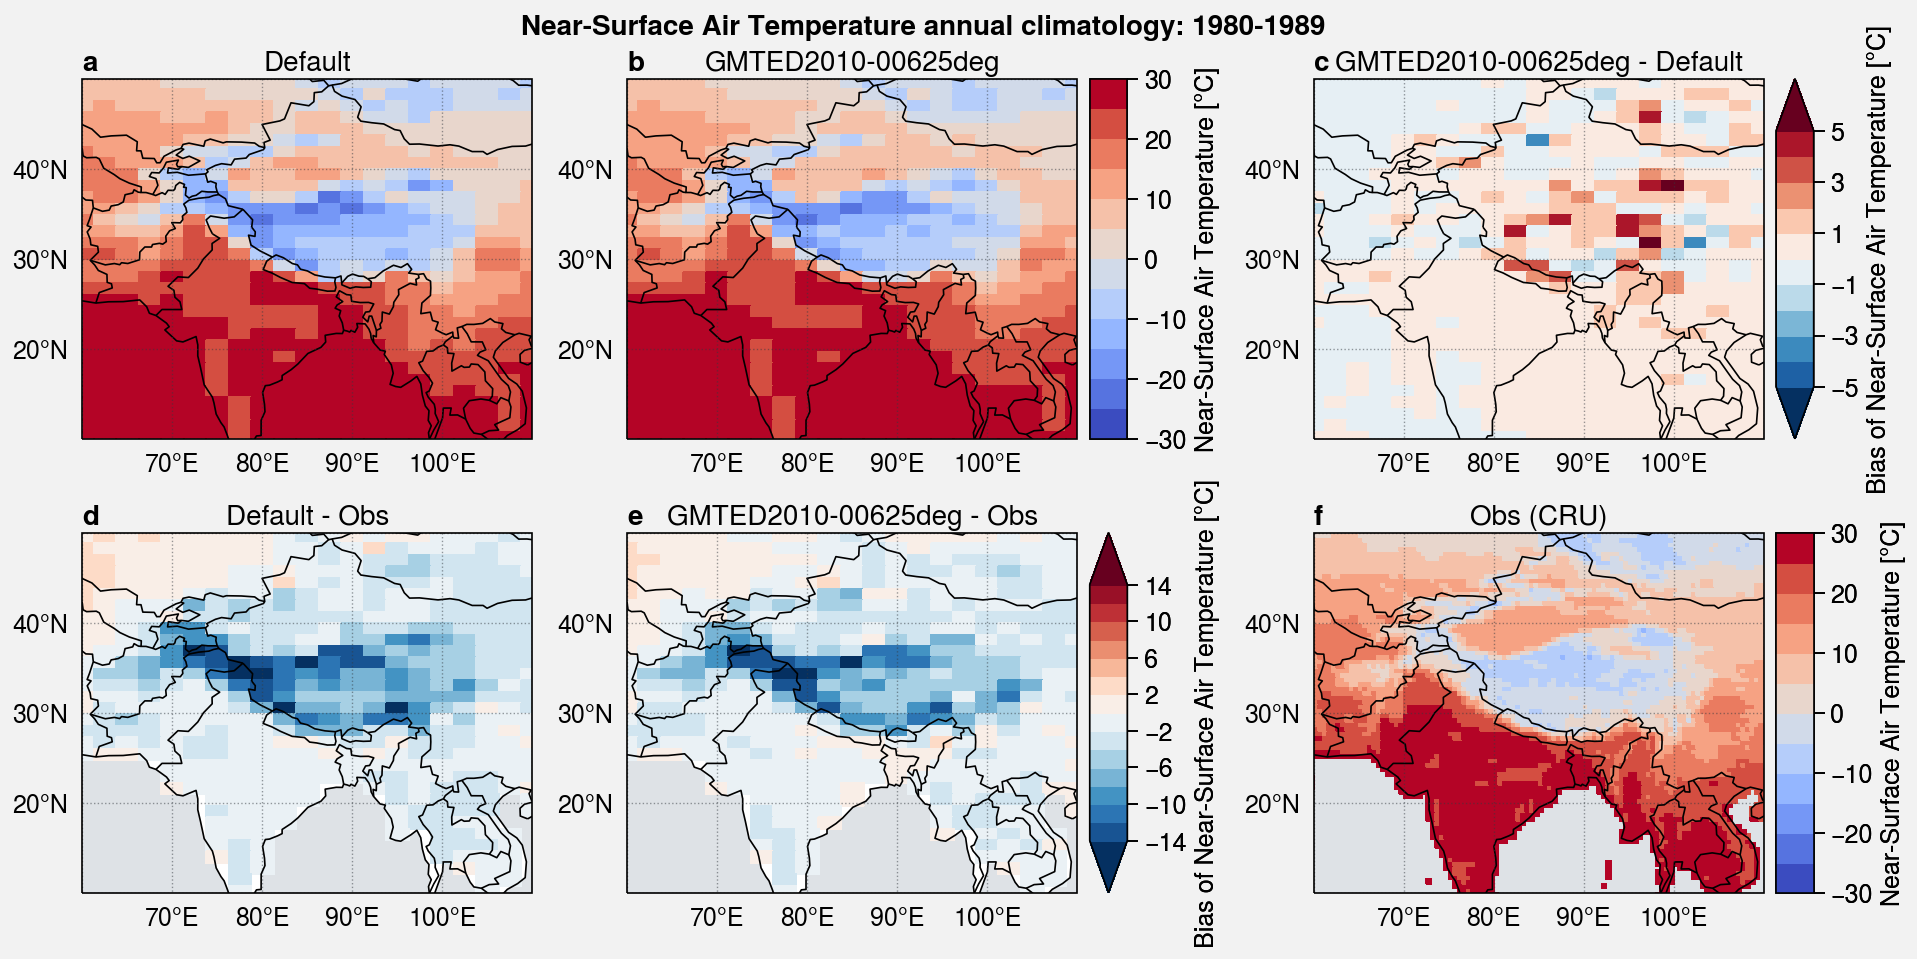

In [39]:
f, axs = plot.subplots(proj='cyl', ncols=3, nrows=2)

levels_diff = plot.arange(-5,5,1)
cmap_diff = 'BuRd'
extend_diff = 'both'

levels_bias = plot.arange(-14,14,2)
cmap_bias = 'BuRd'
extend_bias = 'both'

# First row: differences GMTED2010-00625deg / not guide
axs[0].pcolormesh(model_1_clim, cmap=cmap, levels=levels)
axs[0].format(title=title_1)

m1 = axs[1].pcolormesh(model_2_clim, cmap=cmap, levels=levels)
axs[1].format(title=title_2)
axs[1].colorbar(m1, label=label+ ' ['+units+']')

m2 = axs[2].pcolormesh(model_2_clim - model_1_clim, cmap=cmap_diff, levels=levels_diff, extend=extend_diff)
axs[2].format(title=title_2+' - '+title_1)
axs[2].colorbar(m2, label='Bias of '+label+ ' ['+units+']')


# Second row: differences with obs

m3 = axs[3].pcolormesh(model_1_clim - obs_clim_regrid, cmap=cmap_bias, levels=levels_bias, extend=extend_bias)
axs[3].format(title=title_1+' - Obs')

axs[4].pcolormesh(model_2_clim - obs_clim_regrid, cmap=cmap_bias, levels=levels_bias, extend=extend_bias)
axs[4].format(title=title_2+' - Obs')
axs[4].colorbar(m3, label='Bias of '+label+ ' ['+units+']')

axs[5].pcolormesh(obs_clim, cmap=cmap, levels=levels)
axs[5].format(title='Obs ('+obs_name+')')
axs[5].colorbar(m1, label=label+ ' ['+units+']')


axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
    coast=True, ocean=True, oceancolor='gray3', borders=True,
    suptitle=label+" annual climatology: "+period.start+"-"+period.stop,
    lonlines=10, latlines=10, abc=True, latlim=latlim, lonlim=lonlim
)

f.save('img/'+var+'_relief_'+period.start+'-'+period.stop+'.jpg')
f.save('img/'+var+'_relief_'+period.start+'-'+period.stop+'.png')
f.save('img/'+var+'_relief_'+period.start+'-'+period.stop+'.pdf')